### nber experiments
see
https://sites.google.com/site/patentdataproject/Home/downloads


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib.colors import LogNorm

%matplotlib inline

In [639]:
%load_ext line_profiler

In [274]:
!ls -l

total 3870464
-rw-r--r--@ 1 ahuxor  staff   25172159  4 Aug  2010 assignee.asc
-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rw-r--r--@ 1 ahuxor  staff   12956394 10 Feb  2011 assignee.dta.zip
-rw-r--r--  1 ahuxor  staff  645511850 10 Jul 13:58 cite76_06.csv
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rw-rw-rw-@ 1 ahuxor  staff     788072 28 Jul  2010 dynass.dat
-rw-r--r--  1 ahuxor  staff     201570 17 Jul 13:10 nber_experiments.ipynb
-rwxr-xr-x@ 1 ahuxor  staff   56791108 17 Aug  2013 orig_gen_76_06.dta
-rw-r--r--@ 1 ahuxor  staff  364030957  4 Aug  2010 pat76_06_assg.dta
-rw-r--r--@ 1 ahuxor  staff  117515188  4 Aug  2010 pat76_06_assg.dta.zip
-rw-r--r--@ 1 ahuxor  staff  341070760  4 Aug  2010 pat76_06_ipc.asc
-rw-r--r--@ 1 ahuxor  staff  127426003 19 Dec  2008 patassg.dat
-rw-r--r--@ 1 ahuxor  staff    1702925 19 Dec  2008 pdpcohdr.dat
drwxr-xr-x  7 ahuxor  staff        238  8 Jun 11:21 user_documentation


In [ ]:
!head -2 pat76_06_ipc.asc

In [230]:
pat76_06_ipc_df = pd.read_csv('pat76_06_ipc.asc',sep='\t',nrows=50)

In [231]:
pat76_06_ipc_df.dtypes

appyear             int64
cat                 int64
gyear               int64
icl                object
icl_class          object
icl_maingroup       int64
iclnum              int64
nclass              int64
numipc              int64
patent              int64
pdpass            float64
subcat              int64
subclass          float64
uspto_assignee      int64
dtype: object

In [ ]:
pat76_06_assg_df = pd.read_csv('pat76_06_assg.asc',sep='\t',nrows=50)

In [ ]:
pat76_06_assg_df.sort_values(by='allcites', ascending=False)

In [413]:
!ls -l

total 2399680
-rw-r--r--  1 ahuxor  staff      21454 18 Jul 13:04 NBER_generality_originality_heatmap.pdf
-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rw-rw-rw-@ 1 ahuxor  staff     788072 28 Jul  2010 dynass.dat
-rw-r--r--  1 ahuxor  staff     364076 18 Jul 13:05 nber_experiments.ipynb
-rwxr-xr-x@ 1 ahuxor  staff   56791108 17 Aug  2013 orig_gen_76_06.dta
-rw-r--r--@ 1 ahuxor  staff  364030957  4 Aug  2010 pat76_06_assg.dta
-rw-r--r--@ 1 ahuxor  staff  252609858  4 Aug  2010 pat76_06_ipc.dta
-rw-r--r--@ 1 ahuxor  staff  263827184  7 Apr  2008 patassg.dta
-rw-r--r--@ 1 ahuxor  staff    1702925 19 Dec  2008 pdpcohdr.dat
drwxr-xr-x  7 ahuxor  staff        238  8 Jun 11:21 user_documentation


In [196]:
# note that first few assignees do seem to actually start with an ampersand
junk = pd.read_csv('assignee.asc',nrows=20)
!head -5 assignee.asc

cod	cod_fix	pdpass	standard_name	uspto_assignee
"US institute"	32	12832332	"& AEROSPACE FOUND"	835951
"02 US corporation"	"No change"	11624193	"& COMMUNICATIONS"	721167
"03 Foreign corp, incl. state-owned"	"No change"	12549858	"& DESIGN LTD"	806186
"03 Foreign corp, incl. state-owned"	"No change"	11170486	"& FR"	182855


In [2]:
cite76_06_df = pd.read_stata('cite76_06.dta')


In [3]:
# it looks as if the cited patents do not go back before 1976
# so the lowest cited patent number (earlier?) is 3939271, dated 6 Jan 1976
cite76_06_df.sort_values(by='cited', ascending=True).head()

,citing,cited,ncites7606
0,5135226,3930271,6
1,5592695,3930271,6
2,5621918,3930271,6
3,5624296,3930271,6
4,5675839,3930271,6


In [9]:
len(cite76_06_df)

23650891

In [6]:
cited_patent_nums = cite76_06_df.cited.unique()

In [8]:
len(cited_patent_nums)

2516969

In [426]:
# this patent is for a golfing glove, which itself cites 2 older patents: 2379430 & 2782422
# but if I look for citing = 3939271, I get an empty frame
cite76_06_df[cite76_06_df.citing==3939271]

,citing,cited,ncites7606


In [329]:
# group citation data by cited patent number
grouped_cites = cite76_06_df.groupby(by='cited')
grouped_cites_df = pd.DataFrame(grouped_cites.size().reset_index(name = "Group_Count"))
grouped_cites_df_sorted = grouped_cites_df.sort_values(by='Group_Count', ascending=False)
grouped_cites_df_sorted.head()

,cited,Group_Count
742259,4723129,1804
497379,4463359,1587
704507,4683202,1555
758951,4740796,1519
586651,4558333,1482


In [332]:
aa = grouped_cites_df_sorted.reset_index()[['cited','Group_Count']]
aa.tail()

,cited,Group_Count
2516964,6058129,1
2516965,4192258,1
2516966,6058126,1
2516967,6058123,1
2516968,7118895,1


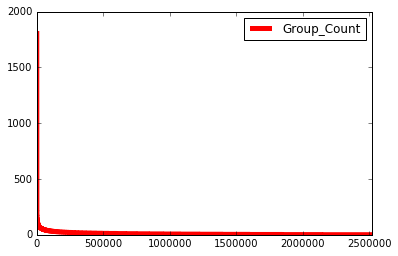

In [335]:
aa.plot(y='Group_Count',c='r',xlim=(-500,2516968),linewidth=5)

In [336]:
# get log of counts
bb = aa[1:]
bb['log_counts'] = np.log10(bb.Group_Count) 
bb['log_index'] = np.log10(bb.index) 

bb.head(15)

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cited,Group_Count,log_counts,log_index
1,4463359,1587,3.200577,0.000000
2,4683202,1555,3.191730,0.301030
3,4740796,1519,3.181558,0.477121
4,4558333,1482,3.170848,0.602060
5,4683195,1460,3.164353,0.698970
6,4345262,1453,3.162266,0.778151
7,4313124,1418,3.151676,0.845098
8,4459600,1390,3.143015,0.903090
9,4733665,1015,3.006466,0.954243
10,5103459,917,2.962369,1.000000


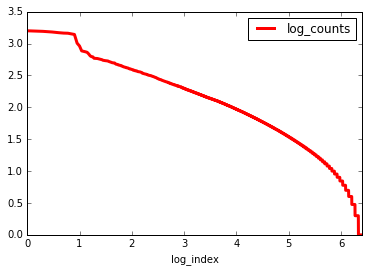

In [338]:
# plot log-log of index against patant counts. Seems to be a shortfall at top end.
bb.plot(x='log_index',y='log_counts',c='r',linewidth=3)

In [ ]:
# not a very good zipf law. This may be due to thos at the latter years not having time to accrue citations.
# I should maybe use only the first deciade or so, or use their citation correction factor.
# but need to merge a few datfiles first.

In [373]:
# read in originality and generality measures data, which is only in the Strata9 .dta format
orig_gen_76_06_df = pd.read_stata('orig_gen_76_06.dta')

In [381]:
len(orig_gen_76_06_df)

3154980

In [380]:
orig_gen_76_06_df.head()
orig_gen_76_06_df_gen_notnull = orig_gen_76_06_df[orig_gen_76_06_df.general.notnull()]
len(orig_gen_76_06_df_gen_notnull)

2142036

In [383]:
# percetage of orig_gen data with active generality measures
2142036/3154980

0.6789380598292224

In [384]:

orig_gen_76_06_df_orig_notnull = orig_gen_76_06_df[orig_gen_76_06_df.orig.notnull()]
len(orig_gen_76_06_df_orig_notnull)

2469808

In [385]:
# percetage of orig_gen data with active originality measures
2469808/3154980

0.7828284172958307

In [388]:
# get proportion of patent with both active genarality and originality measures.
orig_gen_76_06_df_genorig_notnull = orig_gen_76_06_df[(orig_gen_76_06_df.general.notnull())&(orig_gen_76_06_df.orig.notnull())]
len(orig_gen_76_06_df_genorig_notnull)


1603141

In [389]:
# percetage of orig_gen data with active originality and generality measures
1603141/3154980

0.5081303209529062

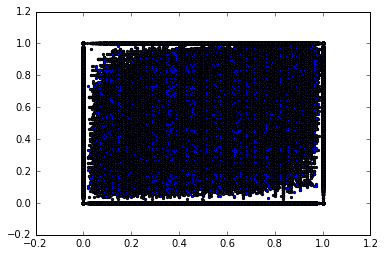

In [398]:
orig_gen_76_06_df_genorig_notnull
plt.scatter(orig_gen_76_06_df_genorig_notnull.general,orig_gen_76_06_df_genorig_notnull.orig,marker='.')

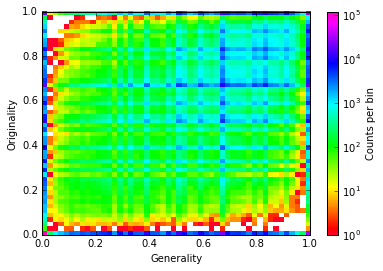

In [412]:
plt.hist2d(orig_gen_76_06_df_genorig_notnull.general, orig_gen_76_06_df_genorig_notnull.orig, bins=[50,50], cmap='gist_rainbow',norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
plt.xlabel('Generality')
plt.ylabel('Originality')
# plt.title('Number density: generality against orginality')
plt.savefig("NBER_generality_originality_heatmap.pdf", bbox_inches = 'tight', pad_inches = 0.1)

In [232]:
# MAIN
# read in main data file in the Strata9 .dta format
!date
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')
!date

Mon 17 Jul 2017 12:38:22 BST
Mon 17 Jul 2017 12:39:59 BST


In [233]:
pat76_06_assg_df.head().T

,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


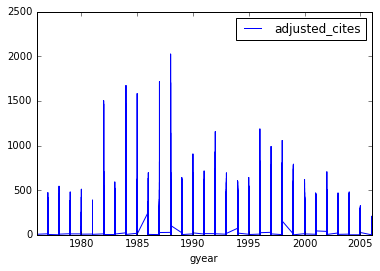

In [321]:
pat76_06_assg_df['adjusted_cites'] = pat76_06_assg_df.allcites * pat76_06_assg_df.hjtwt
pat76_06_assg_df.plot(x='gyear',y='adjusted_cites')

In [234]:
len(pat76_06_assg_df)

3279509

In [235]:
!date
print(len(pat76_06_assg_df.pdpass))
!date

Mon 17 Jul 2017 12:45:24 BST
3279509
Mon 17 Jul 2017 12:45:24 BST


In [236]:
!date
unique_assignees = pat76_06_assg_df.pdpass.unique()
print(len(unique_assignees))
!date

Mon 17 Jul 2017 12:45:25 BST
223959
Mon 17 Jul 2017 12:45:25 BST


In [655]:
# get the records for those patents where the assignee is NaN
nan_pdpasses = pat76_06_assg_df[pat76_06_assg_df.pdpass.isnull()]

In [658]:
len(nan_pdpasses)

505557

In [659]:
nan_pdpasses.tail().T

,3279310,3279351,3279375,3279439,3279462
allcites,0,0,0,0,0
appyear,2004,2001,2006,2003,2004
asscode,NaN,NaN,NaN,NaN,NaN
assgnum,NaN,NaN,NaN,NaN,NaN
cat,2,2,2,2,4
cat_ocl,2,2,2,2,4
cclass,710/110,711/164,713/183,715/738,716/19
country,,,,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,26,26,26,26,26


In [246]:
grouped = pat76_06_assg_df.groupby(by='pdpass')
grouped_df = pd.DataFrame(grouped.size().reset_index(name = "Group_Count"))
grouped_df_sorted = grouped_df.sort_values(by='Group_Count', ascending=False)
grouped_df_sorted.head()

,pdpass,Group_Count
5375,10083419.0,45146
395,10033664.0,31975
13479,10180289.0,28356
31691,10446448.0,26188
1789,10045727.0,23727


In [259]:

xx = grouped_df_sorted.reset_index()[['pdpass','Group_Count']]
xx.head()

,pdpass,Group_Count
0,10083419.0,45146
1,10033664.0,31975
2,10180289.0,28356
3,10446448.0,26188
4,10045727.0,23727


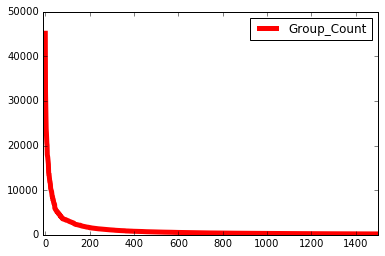

In [296]:
xx.plot(y='Group_Count',xlim=(-10,1500),ylim=(0,50000),c='r',linewidth=5)

In [312]:
# get log of counts
yy = xx[1:]
yy['log_counts'] = np.log10(yy.Group_Count) 
yy['log_index'] = np.log10(yy.index) 

yy.head(15)

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,pdpass,Group_Count,log_counts,log_index
1,10033664.0,31975,4.504811,0.000000
2,10180289.0,28356,4.452645,0.301030
3,10446448.0,26188,4.418102,0.477121
4,10045727.0,23727,4.375243,0.602060
5,10040685.0,22834,4.358582,0.698970
6,10032884.0,21306,4.328502,0.778151
7,10067050.0,20510,4.311966,0.845098
8,11205194.0,20101,4.303218,0.903090
9,10443080.0,17963,4.254379,0.954243
10,10799365.0,17670,4.247237,1.000000


In [305]:
# how many assignees only have 1 patent?
len(xx[xx.Group_Count ==1])

122771

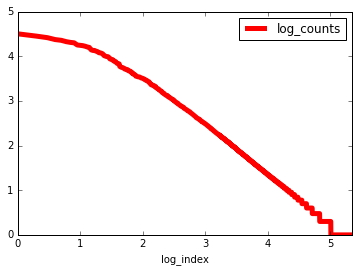

In [311]:
# plot log-log of index against patant counts. Seems to be a shortfall at top end.
yy.plot(x='log_index',y='log_counts',c='r',linewidth=5)

In [45]:
major_assignees_100_df = grouped_df_sorted[0:100]
major_assignees_100_df
major_assignees_100_se = major_assignees_100_df.pdpass
major_assignees_100_se[0:10]

5375     10083419.0
395      10033664.0
13479    10180289.0
31691    10446448.0
1789     10045727.0
1216     10040685.0
286      10032884.0
3916     10067050.0
84851    11205194.0
31488    10443080.0
Name: pdpass, dtype: float64

In [53]:
# need to convert major_assignees_100_se from floats to integers
major_assignees_100_se = major_assignees_100_se.astype(int)
major_assignees_100_se.values

array([10083419, 10033664, 10180289, 10446448, 10045727, 10040685,
       10032884, 10067050, 11205194, 10443080, 10799365, 10459780,
       10842508, 11821807, 10035016, 11317369, 10055147, 10053462,
       10297519, 11275669, 10032645, 10037686, 10111144, 10046713,
       10238964, 10255872, 10045362, 10051908, 10038183, 10981906,
       10949708, 10043759, 11659857, 10182902, 10107597, 10044016,
       10101403, 10318735, 10736866, 10687054, 12633391, 10036456,
       10102636, 10190949, 10207181, 10036902, 11621597, 11103497,
       10098550, 10076366, 10266734, 10219992, 10041457, 10331616,
       10157481, 12406746, 10084882, 10081783, 10044638, 10045844,
       10067795, 10086125, 10871271, 10480018, 11851041, 10775770,
       10257322, 10117336, 10422661, 10076167, 10082948, 10091030,
       10060190, 11303957, 12311019, 11596455, 10043138, 10056418,
       10250620, 10971325, 12035370, 10150062, 11031665, 10151943,
       10959870, 10144127, 10555192, 10166801, 10844670, 11727

In [55]:
# get subset of pat76_06_assg_df win which the pdpass is equal to one of those in major_assignees_100_se
# df[df['A'].isin([3, 6])]
pat76_06_top100_assignees = pat76_06_assg_df[pat76_06_assg_df['pdpass'].isin(major_assignees_100_se.values)]

In [62]:
pat76_06_top100_assignees.head().T

,35,38,48,54,56
allcites,58,8,4,5,8
appyear,1973,1974,1974,1974,1974
asscode,3,2,6,2,2
assgnum,1,1,1,1,1
cat,4,5,6,6,6
cat_ocl,5,5,6,6,6
cclass,438/6,29/593,33/318,37/423,38/77.9
country,DT,US,US,US,US
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [60]:
len(pat76_06_top100_assignees.icl_class.unique())

1963

In [650]:
# read is assignee names datafile
# note that using dta file partly as the asc file has some formatting error asscoiated.
assignee_names = pd.read_stata('assignee.dta')



In [651]:
assignee_names.head(100)

,cod,cod_fix,pdpass,standard_name,uspto_assignee
0,US institute,32,12832332,& AEROSPACE FOUND,835951.0
1,02 US corporation,No change,11624193,& COMMUNICATIONS,721167.0
2,"03 Foreign corp, incl. state-owned",No change,12549858,& DESIGN LTD,806186.0
3,"03 Foreign corp, incl. state-owned",No change,11170486,& FR,182855.0
4,"03 Foreign corp, incl. state-owned",No change,10513915,& SA FAB DEBAUCHES,182585.0
5,02 US corporation,No change,13143949,& SON INC,NaN
6,02 US corporation,No change,10817896,& YET INC,30140.0
7,"03 Foreign corp, incl. state-owned",No change,12517845,&&T TECH CO LTD,802588.0
8,"03 Foreign corp, incl. state-owned",No change,13028479,01 COMMUNIQUE LAB INC,NaN
9,"03 Foreign corp, incl. state-owned",No change,12986393,01 DB METRAVIB,NaN


what are all the ampersands at the start of the top of this file? Are they real or an error?

In [214]:
assignees_groupedby_pdpass = assignee_names.groupby(by='pdpass')
assignees_groupedby_pdpass.count()
# grouped_df = pd.DataFrame(grouped.size().reset_index(name = "Group_Count"))
assignees_grouped_df = pd.DataFrame(assignees_groupedby_pdpass.size().reset_index(name = "Group_Count"))
# grouped_df_sorted = grouped_df.sort_values(by='Group_Count', ascending=False)
assignees_grouped_df_sorted = assignees_grouped_df.sort_values(by='Group_Count', ascending=False)

assignees_grouped_df_sorted.head()



,pdpass,Group_Count
0,-19842,32430
23758,10067050,119
28883,10126157,115
25217,10083419,115
19893,10030628,105


In [226]:
# what is the pdpass=-19842?
# all are cod = '05 Foreign individual', none are not that ...
assignee_names[(assignee_names.pdpass==-19842) & (assignee_names.cod !='05 Foreign individual')]

,cod,cod_fix,pdpass,standard_name,uspto_assignee


In [227]:
# what is the pdpass=-0067050? with the next greatest (119) entries
# all are appear to be version of (misspellings?) of Mitsubushi
assignee_names[(assignee_names.pdpass==10067050)]

,cod,cod_fix,pdpass,standard_name,uspto_assignee
53220,"03 Foreign corp, incl. state-owned",No change,10067050,CHUBU ELECTRIC CO INC MITSUBISHI DENKI KK & NG...,379245.0
179653,"03 Foreign corp, incl. state-owned",No change,10067050,MATSUBISHI DENKI KK,379245.0
189859,"03 Foreign corp, incl. state-owned",No change,10067050,MIRSUBISHI DENKI KK,379245.0
190007,"03 Foreign corp, incl. state-owned",No change,10067050,MISTUBISHI DENKI KAUBSHIKI KAISHA,379245.0
190008,"03 Foreign corp, incl. state-owned",No change,10067050,MISTUBISHI DENKI KK,379245.0
190020,"03 Foreign corp, incl. state-owned",No change,10067050,MISUBISHI DENKI KK,379245.0
190094,"03 Foreign corp, incl. state-owned",No change,10067050,MITBUSHI DENKI KK,379245.0
190096,"03 Foreign corp, incl. state-owned",No change,10067050,MITBUSHIKI DENKI KK,379245.0
190203,"03 Foreign corp, incl. state-owned",No change,10067050,MITISUBISHI DENKI KK,379245.0
190238,"03 Foreign corp, incl. state-owned",No change,10067050,MITSBUISHI DENKI KK,379245.0


In [228]:
# what is the pdpass=10126157? with the next greatest (115) entries
# all are appear to be version of (misspellings?) of Fraunhofer
assignee_names[(assignee_names.pdpass==10126157)]

,cod,cod_fix,pdpass,standard_name,uspto_assignee
100233,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FORSCHUNG EV FRAUNHOFER GES ZUR FOERDERUNG DER...,659597.0
100301,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FORSHUNG EV FRAUNHOFER GES ZUR FORDERUNG DER A...,659597.0
101309,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRANHOFER GES ZUR FORDERUNG DER ANGEWANDTEN FO...,659597.0
101486,Foreign institute,No change,10126157,FRANNHOFER GES ZUR FORDERUNG DER ANGEWANDTEN F...,659597.0
101504,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRANUNHOFER GES ZUR FOERDE RUNG DER ANGWANDTEN...,659597.0
101678,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRAUHOFER GES ZUR FODERUNG DER ANGEWANDTEN FOR...,659597.0
101679,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRAUHOFER GES ZUR FORDERUNG DER ANGEWANDTEN FO...,659597.0
101680,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRAUMHOFER GES ZUR FORDERUNG DER ANGEWANDTEN F...,659597.0
101681,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRAUN HOFER GES ZUR FORDERUNG DER ANGEWANDTEN ...,659597.0
101683,Foreign institute,"05, no ';' in standard_name, no US add., infer...",10126157,FRAUNHOEFER GES ZUR FOERDERUNG DER ANGEWANDTEN...,659597.0


In [229]:
# what is the pdpass=10083419? with the next greatest (also 115) entries
# all are appear to be version of (misspellings?) of IBM
assignee_names[(assignee_names.pdpass==10083419)]

,cod,cod_fix,pdpass,standard_name,uspto_assignee
19535,02 US corporation,No change,10083419,ARMONK BUSINESS MACHINES CORP,280070.0
131140,02 US corporation,No change,10083419,IBM,280070.0
131141,02 US corporation,No change,10083419,IBM BUSINESS MACHINES CORP,280070.0
131142,02 US corporation,No change,10083419,IBM CORP,280070.0
131143,02 US corporation,No change,10083419,IBM CORP INT BUSINESS MACHINES CORP,280070.0
131144,02 US corporation,No change,10083419,IBM CORP INT BUSINESS MACHINES CORPORATION,280070.0
131145,02 US corporation,No change,10083419,IBM CORP OF ARMONK,280070.0
131147,02 US corporation,No change,10083419,IBM INT BUSINESS MACHINES CORP,280070.0
131150,02 US corporation,No change,10083419,IBM PATENT OPERATIONS,280070.0
132276,02 US corporation,No change,10083419,IINTERNATIONAL BUSINESS MACHINES CORP,280070.0


above has a problem or does it? (the negative pdpass values must be the non-utlity patents, I assume...See the matchdoc description.


In [449]:
groupedby_pdpdass = pat76_06_assg_df.groupby(by='pdpass')

groupedby_pdpdass.head().T

,0,1,2,3,4,5,6,7,8,9,...,3279415,3279417,3279431,3279432,3279434,3279438,3279440,3279443,3279454,3279502
allcites,6,0,20,4,1,3,3,2,5,34,...,0,0,0,0,0,0,0,0,0,0
appyear,1974,1974,1975,1974,1975,1972,1974,1974,1974,1974,...,2003,2003,2003,2003,2000,2001,2001,2001,2004,2001
asscode,2,2,2,1,1,2,2,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assgnum,1,1,1,NaN,NaN,1,1,NaN,NaN,1,...,1,1,1,2,1,1,1,1,1,1
cat,6,6,6,5,6,6,6,6,6,6,...,2,2,2,2,2,2,2,2,4,2
cat_ocl,6,6,6,NaN,6,6,6,6,6,6,...,2,2,2,2,2,2,2,2,4,2
cclass,2/161.4,5/11,5/430,114/354,12/142S,15/53.4,15/83,15/166,15/250.44,15/257.05,...,714/747,714/762,715/239,715/239,715/210,715/731,715/744,715/762,716/6,726/6
country,US,US,US,,,US,US,,,US,...,US,US,JP,JP,US,US,US,US,US,US
ddate,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6,6,6,6,6,6,...,26,26,26,26,26,26,26,26,26,26


In [464]:
!date
unique_icl_class = pat76_06_assg_df.icl_class.unique()
print(len(unique_icl_class))
!date

Wed 19 Jul 2017 11:37:31 BST
4205
Wed 19 Jul 2017 11:37:32 BST


In [ ]:
# create dataframe with just assignees and main ipc class
assignees_ipc_class_df = pat76_06_assg_df[['pdpass','patent','icl_class','icl_maingroup']]

In [ ]:
assignees_ipc_class_df

In [ ]:
assignees_ipc_class_df.merged_icl[0:1]

In [ ]:
# create merged ipc class from two components
assignees_ipc_class_df['merged_icl'] = (assignees_ipc_class_df.icl_class + str(assignees_ipc_class_df.icl_maingroup))

In [ ]:
import networkx as nx

In [ ]:
test = assignees_ipc_class_df[:10000]

In [ ]:
G=nx.from_pandas_dataframe(test, source='pdpass', target='icl_class', edge_attr='patent')

In [ ]:
# G=nx.from_pandas_dataframe(assignees_ipc_class_df, source='pdpass', target='icl_class', edge_attr='patent')

In [ ]:
!date
nx.draw(G,node_size=5)
!date

In [ ]:
nx.graph_clique_number(G)

In [63]:
# this is my starting dataframe for now, with the top 100 assignees.
pat76_06_top100_assignees.head()

,allcites,appyear,asscode,assgnum,cat,cat_ocl,cclass,country,ddate,gday,...,state,status,subcat,subcat_ocl,subclass,subclass1,subclass1_ocl,subclass_ocl,term_extension,uspto_assignee
35,58,1973,3.0,1.0,4.0,5.0,438/6,DT,NaT,6,...,,,46.0,52.0,6.000000,6,574,574.0,0,478430.0
38,8,1974,2.0,1.0,5.0,5.0,29/593,US,NaT,6,...,NY,,52.0,52.0,593.000000,593,628,628.0,0,19715.0
48,4,1974,6.0,1.0,6.0,6.0,33/318,US,NaT,6,...,DC,,69.0,69.0,318.000000,318,318,318.0,0,597185.0
54,5,1974,2.0,1.0,6.0,6.0,37/423,US,NaT,6,...,MI,,64.0,64.0,423.000000,423,8,8.0,0,219155.0
56,8,1974,2.0,1.0,6.0,6.0,38/77.9,US,NaT,6,...,CT,,63.0,63.0,77.900002,77.9,77,77.0,0,218550.0


In [106]:

# now group this new starter dataframe, by both assignee and by icl_class
test = pat76_06_top100_assignees.groupby(by=['pdpass','icl_class'])
test_df = pd.DataFrame(test.size().reset_index())




In [107]:
len(pat76_06_top100_assignees.pdpass.unique())

99

problem with above is just that it does not include those classes with zero entry

In [108]:
test_df.head()

,pdpass,icl_class,0
0,10030628.0,A01H,1
1,10030628.0,A01K,3
2,10030628.0,A01N,3
3,10030628.0,A41D,3
4,10030628.0,A42B,2


In [150]:
all_icl_class = all_icl_class.tolist
type(all_icl_class)

builtin_function_or_method

In [171]:

# need list of ALL icl_class'es 
all_icl_class = test_df.icl_class.unique()
len(all_icl_class)
# create empty list zeros of this length
a = [0] * len(all_icl_class)
# create dataframe of these names and zeros
dfxx = pd.DataFrame({'icl_class':all_icl_class, 'patents':a})
dfxx.head()
junk = dfxx.copy()

In [168]:
# lets take first assignee (IBM) = 10030628
ibm_classes = test_df[test_df.pdpass == 10030628]
print(ibm_classes.head())
ibm_classes.dtypes

       pdpass icl_class  0
0  10030628.0      A01H  1
1  10030628.0      A01K  3
2  10030628.0      A01N  3
3  10030628.0      A41D  3
4  10030628.0      A42B  2


pdpass       float64
icl_class     object
0              int64
dtype: object

In [348]:
patassg_df = pd.read_stata('patassg.dta')

In [354]:
patassg_df.head()
len(patassg_df)

3032482

In [352]:
utility_patents = patassg_df[patassg_df.ptype=='0']

In [353]:
len(utility_patents)

2812428

In [356]:
utility_patents.head()

,sta,cnt,assgnum,cty,pdpass,ptype,patnum
0,IL,,1,Chicago,10030271,0,3930271
1,PA,,1,Bedford,10156902,0,3930272
2,MO,,1,St. Louis,10112031,0,3930273
3,IL,,1,Chicago,10030276,0,3930276
4,MN,,1,Spring Park,10172187,0,3930277


In [362]:
grouped_utility_patents = utility_patents.groupby(by='patnum')
grouped_utility_patents_df = pd.DataFrame(grouped_utility_patents.size().reset_index(name = "Group_Count"))
grouped_utility_patents_df_sorted = grouped_utility_patents_df.sort_values(by='Group_Count', ascending=False)


In [370]:
grouped_utility_patents_df_sorted.head()
len(grouped_utility_patents_df_sorted[grouped_utility_patents_df_sorted.Group_Count==1])

2659508

In [371]:
len(grouped_utility_patents_df_sorted[grouped_utility_patents_df_sorted.Group_Count==2])

65196

In [414]:
!ls

NBER_generality_originality_heatmap.pdf pat76_06_assg.dta
assignee.dta                            pat76_06_ipc.dta
cite76_06.dta                           patassg.dta
dynass.dat                              pdpcohdr.dat
nber_experiments.ipynb                  user_documentation
orig_gen_76_06.dta


In [415]:
# load in IPC classification data
pat76_06_ipc_df = pd.read_stata('pat76_06_ipc.dta')


In [416]:
pat76_06_ipc_df.head()

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee
0,1974,6.0,1976,A41D 1900,A41D,19.0,1,2.0,1,3930271,10030271.0,63.0,161.399994,251415.0
1,1974,6.0,1976,A47D 701,A47D,7.0,1,5.0,1,3930272,10156902.0,65.0,11.000000,246000.0
2,1975,6.0,1976,A47D 702,A47D,7.0,1,5.0,2,3930273,10112031.0,65.0,430.000000,10490.0
3,1975,6.0,1976,A47C 2100,A47C,21.0,2,5.0,2,3930273,10112031.0,65.0,430.000000,10490.0
4,1974,5.0,1976,B63B 708,B63B,7.0,1,114.0,1,3930274,NaN,55.0,354.000000,0.0


In [681]:
pat76_06_ipc_df[pat76_06_ipc_df.pdpass==10030581].T

,434
appyear,1975
cat,5
gyear,1976
icl,G06F 738
icl_class,G06F
icl_maingroup,7
iclnum,1
nclass,209
numipc,1
patent,3930581


In [427]:
# /Users/ahuxor/MSc/Thesis_Project/Data/patentsView
!ls -l /Users/ahuxor/MSc/Thesis_Project/Data/patentsView

total 9809272
-rwxr-xr-x@ 1 ahuxor  staff   226977591 15 Jun 17:44 figures.tsv
-rw-r--r--  1 ahuxor  staff  4795361961  6 Apr 00:38 patent.tsv
-rwxr-xr-x@ 1 ahuxor  staff        3482 15 Jun 20:54 wipo_field.tsv


In [435]:
figures_df = pd.read_csv('/Users/ahuxor/MSc/Thesis_Project/Data/patentsView/figures.tsv',sep='\t')

In [436]:
len(figures_df)

5729873

In [439]:
figures_df.num_figures.max()

8035

In [660]:
figures_df[figures_df.num_figures==1].head()

,uuid,patent_id,num_figures,num_sheets
8,0001k7r5q528wfsx3g5in9zpk,6741119,1,1
20,0006499120hw8iwt57dm01ypi,4582787,1,1
31,0008xt3k1t5ssp07naynv5mbi,6354259,1,1
37,000aaavti3urfdr3rkbnugfa0,9528110,1,1
76,000gvwyq2mwfnazc1npwvv45y,5086281,1,1


In [652]:
!date
# now try and get vectors for each assignee of the number of patents they hols in each icl_class

# create final dataframe to hold results, starting with all classes as first column
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})

# first get list of (unique) assignees (try first five first to test code)
test_range = unique_assignees[0:100]
# then for each one of them, 
for assignee in test_range:
    # look at all the patents they have
    temp = pat76_06_assg_df[pat76_06_assg_df.pdpass==assignee].icl_class
    icl_codes_in_current = temp.values
    #  and count instances of these
    n = len(unique_icl_class)
    icl_codes_per_assignee_vector = [0] * n 
    for m in range(0,n):
        current_icl_class = unique_icl_class[m]
        counted = list(icl_codes_in_current).count(current_icl_class)
        icl_codes_per_assignee_vector[m] = counted
        col_name_used = assignee.astype(str)
        feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
!date

Fri 21 Jul 2017 08:42:30 BST
Fri 21 Jul 2017 09:46:49 BST


In [672]:
print(len(feature_vectors_df))
feature_vectors_df.head()


4205


,icl_class,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,...,10049554.0,10280560.0,10032638.0,10368224.0,10780383.0,10138415.0,10032655.0,11046456.0,10109257.0,10032666.0
0,A41D,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,A47D,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B63B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A43D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B60S,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [648]:
# COPY OF ABOVE CELL TO TRY AND VECTORISE FOR-LOOPS
!date
# now try and get vectors for each assignee of the number of patents they hols in each icl_class

# create final dataframe to hold results, starting with all classes as first column
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})

# first get list of (unique) assignees (try first five first to test code)
test_range = unique_assignees[0:10]
# then for each one of them, 
for assignee in test_range:
    # look at all the patents they have
    temp = pat76_06_assg_df[pat76_06_assg_df.pdpass==assignee].icl_class
    icl_codes_in_current = temp.values
    #  and count instances of these
    n = len(unique_icl_class)
    icl_codes_per_assignee_vector = [0] * n 
#    for m in range(0,n):
#        current_icl_class = unique_icl_class[m]
#        counted = list(icl_codes_in_current).count(current_icl_class)
#        icl_codes_per_assignee_vector[m] = counted
#        col_name_used = assignee.astype(str)
#        feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
    icl_codes_per_assignee_vector = map(lambda x,y: x+y, xs, ys))
!date

Thu 20 Jul 2017 13:32:15 BST
Thu 20 Jul 2017 13:32:44 BST


In [649]:
icl_codes_in_current

array(['A22B', 'A22B', 'B01D', 'B61B', 'A22B', 'B61B', 'G01G', 'E01B',
       'E01B', 'A22B', 'A22B', 'A22B', 'A22B'], dtype=object)

In [653]:
feature_vectors_df.head()

,icl_class,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,...,10049554.0,10280560.0,10032638.0,10368224.0,10780383.0,10138415.0,10032655.0,11046456.0,10109257.0,10032666.0
0,A41D,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,A47D,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B63B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A43D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B60S,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [536]:
len(unique_assignees)

223959

In [539]:
(223959*3)/(60*60)

186.6325

In [563]:
!date
print(1-cosine(feature_vectors_df["10030276.0"], feature_vectors_df["10699376.0"]))
!date

Wed 19 Jul 2017 18:11:41 BST
0.0164967351294
Wed 19 Jul 2017 18:11:41 BST


In [555]:
feature_vectors_df.head()

,0,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,...,10084882.0,10030414.0,10140712.0,10286499.0,10679547.0,10699376.0,10078381.0,10116963.0,10235236.0,10198604.0
0,A41D,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A47D,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B63B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A43D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B60S,0,0,0,0,2,0,0,0,0,...,18,0,0,1,1,6,0,0,0,0


In [561]:
a = feature_vectors_df.drop(0,axis=1)
a.head()


,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,10036908.0,...,10084882.0,10030414.0,10140712.0,10286499.0,10679547.0,10699376.0,10078381.0,10116963.0,10235236.0,10198604.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,...,18,0,0,1,1,6,0,0,0,0


In [674]:
assignee_array = feature_vectors_df.columns.values
assignee_array[1]

'10030271.0'

In [678]:
# go through each column header and compare it to the first by cosine similarity
# NOTE: does not like NaN, so clear these out - if not useful

# set number of patents available
pnum = 1000
# create a matrix to hold results
cos_ang_mat = np.zeros((pnum,pnum))
for i in range(1,pnum):
    tempi = assignee_array[i]
    for j in range(1,pnum):
        tempj = assignee_array[j]
        cos_similarity = 1-cosine(feature_vectors_df[tempi], feature_vectors_df[tempj])
        cos_ang_mat[i,j] = cos_similarity
        # print(cos_sim)
        if (cos_similarity>0.95) & (tempi!=tempj):
            print('close for ',tempi,tempj,' with cos_ang = ',cos_similarity)


/Users/ahuxor/.local/lib/python3.4/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in true_divide
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


close for  10030281.0 10031659.0  with cos_ang =  1.0
close for  10577942.0 11130164.0  with cos_ang =  0.975342893301
close for  10577942.0 10917244.0  with cos_ang =  0.971254157771
close for  10200651.0 10601048.0  with cos_ang =  0.984731927835
close for  10030288.0 10030364.0  with cos_ang =  1.0
close for  10515817.0 10055101.0  with cos_ang =  0.952524908741
close for  10140808.0 11073260.0  with cos_ang =  0.971692299434
close for  10140808.0 10053799.0  with cos_ang =  0.988058520739
close for  10140808.0 10061834.0  with cos_ang =  0.970852391556
close for  10030327.0 10031689.0  with cos_ang =  1.0
close for  10030332.0 10704074.0  with cos_ang =  0.983930955873
close for  10704074.0 10030332.0  with cos_ang =  0.983930955873
close for  10030354.0 10376738.0  with cos_ang =  0.997054485502
close for  10030354.0 10031857.0  with cos_ang =  1.0
close for  10030357.0 10030383.0  with cos_ang =  1.0
close for  10030357.0 10526855.0  with cos_ang =  1.0
close for  10030357.0 1003

In [711]:
patent_ids = feature_vectors_df.columns.values[1:]
patent_ids

array(['10030271.0', '10156902.0', '10112031.0', 'nan', '10030276.0',
       '10172187.0', '10679134.0', '10030281.0', '10577942.0',
       '10036908.0', '10085072.0', '10200651.0', '10030286.0',
       '10030288.0', '10048453.0', '10151655.0', '10680932.0',
       '11474328.0', '10515817.0', '10700759.0', '10105812.0',
       '10030298.0', '10204962.0', '10045633.0', '10030301.0',
       '10098338.0', '10131500.0', '10046713.0', '10155465.0',
       '10430930.0', '10157481.0', '10140808.0', '10285889.0',
       '10036902.0', '11105728.0', '10197599.0', '10045362.0',
       '10615562.0', '10446448.0', '10030327.0', '10030332.0',
       '10704074.0', '10030335.0', '10090805.0', '10207824.0',
       '10030338.0', '10120593.0', '10127546.0', '10031696.0',
       '10030344.0', '10078916.0', '10312446.0', '10030349.0',
       '10459323.0', '10052492.0', '10072465.0', '10031601.0',
       '10030354.0', '10461006.0', '10030357.0', '10107775.0',
       '10135673.0', '10634775.0', '10030364.0',

In [719]:
cos_ang_mat_df = pd.DataFrame(cos_ang_mat)
cos_ang_mat_df.columns = patent_ids
cos_ang_mat_df.set_index(patent_ids, inplace=True)
cos_ang_mat_df

,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,10036908.0,...,10049554.0,10280560.0,10032638.0,10368224.0,10780383.0,10138415.0,10032655.0,11046456.0,10109257.0,10032666.0
10030271.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10156902.0,0.0,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10112031.0,0.0,0.000000,1.000000,0.045943,NaN,0.000000,0.012417,0.008977,0.000000,0.000000,...,0.000000,0.000365,0.000000,0.000000,0.000000,0.007572,0.000000,0.000000,0.001630,0.000205
nan,0.0,0.000000,0.045943,1.000000,NaN,0.000000,0.000000,0.011631,0.000000,0.000000,...,0.125988,0.009265,0.007630,0.000000,0.000000,0.017986,0.008642,0.000000,0.089599,0.001591
10030276.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172187.0,0.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10679134.0,0.0,0.000000,0.012417,0.000000,NaN,0.000000,1.000000,0.070728,0.938315,0.000000,...,0.000000,0.000639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10030281.0,0.0,0.000000,0.008977,0.011631,NaN,0.000000,0.070728,1.000000,0.075378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004792,0.000000,0.000000,0.001032,0.000000
10577942.0,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.938315,0.075378,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10036908.0,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [697]:
cos_ang_mat_df[cos_ang_mat_df>0.9]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.938315,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.938315,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [600]:
# these two assignees have a cos-ang, see above, of 0.938
print(assignee_names[assignee_names.pdpass==10172187])
print(assignee_names[assignee_names.pdpass==10030281])

                    cod    cod_fix    pdpass         standard_name  \
5156  02 US corporation  No change  10172187    ADVANCE MACHINE CO   
5157  02 US corporation  No change  10172187  ADVANCE MACHINE CORP   

      uspto_assignee  
5156          8665.0  
5157          8665.0  
                                     cod    cod_fix    pdpass standard_name  \
1392  03 Foreign corp, incl. state-owned  No change  10030281   A SUTTER AG   

      uspto_assignee  
1392         42390.0  


In [601]:
# these two assignees have a cos-ang, see above, of 0.972
print(assignee_names[assignee_names.pdpass==11073260])
print(assignee_names[assignee_names.pdpass==10140808])
# could these basically all be an array of zeros?!
# no - see cell below

                      cod    cod_fix    pdpass               standard_name  \
286855  02 US corporation  No change  11073260         THOMAS & BETTS CORP   
286856  02 US corporation  No change  11073260  THOMAS & BETTS CORPROATION   

        uspto_assignee  
286855        573320.0  
286856        573320.0  
                      cod    cod_fix    pdpass               standard_name  \
14912   02 US corporation  No change  10140808                         AMP   
14917   02 US corporation  No change  10140808                    AMP CORP   
14918   02 US corporation  No change  10140808              AMP CORPORATED   
14921   02 US corporation  No change  10140808      AMP GEN PATENT COUNSEL   
14922   02 US corporation  No change  10140808                     AMP INC   
14923   02 US corporation  No change  10140808             AMP INCORPORTED   
14924   02 US corporation  No change  10140808            AMP INCROPORATED   
107740  02 US corporation  No change  10140808  GEN PATENT COUNSEL

In [705]:
# these two assignees have a cos-ang, see above, of 0.9906
print(assignee_names[assignee_names.pdpass==10780383])
print('-----')
print(assignee_names[assignee_names.pdpass==10401313])


                      cod    cod_fix    pdpass               standard_name  \
212860  02 US corporation  No change  10780383    ORTHO PHAMACEUTICAL CORP   
212861  02 US corporation  No change  10780383                 ORTHO PHARM   
212863  02 US corporation  No change  10780383            ORTHO PHARM CORP   
212864  02 US corporation  No change  10780383        ORTHO PHARM CORP INC   
212867  02 US corporation  No change  10780383   ORTHO PHARMACEITICAL CORP   
212868  02 US corporation  No change  10780383  ORTHO PHARMACEUCTICAL CORP   

        uspto_assignee  
212860        421765.0  
212861        421765.0  
212863        421765.0  
212864        421765.0  
212867        421765.0  
212868        421765.0  
-----
                     cod    cod_fix    pdpass         standard_name  \
84581  02 US corporation  No change  10401313              ELI & CO   
84587  02 US corporation  No change  10401313        ELI LIILY & CO   
84588  02 US corporation  No change  10401313       ELI LIL

In [698]:
# these two assignees have a cos-ang, see above, of 0.9886
print(assignee_names[assignee_names.pdpass==10109257])
print(assignee_names[assignee_names.pdpass==10198901])


                     cod    cod_fix    pdpass                standard_name  \
41726  02 US corporation  No change  10109257          BUROUGHS WELCOME CO   
41762  02 US corporation  No change  10109257         BURROUGHS WELCOME CO   
41763  02 US corporation  No change  10109257           BURROUGHS WELLCOME   
41764  02 US corporation  No change  10109257  BURROUGHS WELLCOME & CO INC   
41765  02 US corporation  No change  10109257        BURROUGHS WELLCOME CO   
41766  02 US corporation  No change  10109257    BURROUGHS WELLCOME CO 141   
41767  02 US corporation  No change  10109257       BURROUGHS WELLCOME INC   
41768  02 US corporation  No change  10109257       BURROUGHTS WELLCOME CO   

       uspto_assignee  
41726         81605.0  
41762         81605.0  
41763         81605.0  
41764         81605.0  
41765         81605.0  
41766         81605.0  
41767         81605.0  
41768         81605.0  
                                      cod    cod_fix    pdpass  \
21948  03 Forei

In [622]:
# these two assignees have a cos-ang, of 1.0
print(assignee_names[assignee_names.pdpass==10030357])
print(assignee_names[assignee_names.pdpass==10030383])
# could these basically all be an array of zeros?!


                      cod    cod_fix    pdpass standard_name  uspto_assignee
123426  02 US corporation  No change  10030357      HGP CORP        250360.0
                                      cod    cod_fix    pdpass  \
93056  03 Foreign corp, incl. state-owned  No change  10030383   
93057  03 Foreign corp, incl. state-owned  No change  10030383   

                         standard_name  uspto_assignee  
93056   FA FOUQUET WERK FRAUZ & PLANCK        206080.0  
93057  FA FOUQUET WERKE FRAUZ & PLANCK        206080.0  


In [680]:
feature_vectors_df.head()

,icl_class,10030271.0,10156902.0,10112031.0,nan,10030276.0,10172187.0,10679134.0,10030281.0,10577942.0,...,10049554.0,10280560.0,10032638.0,10368224.0,10780383.0,10138415.0,10032655.0,11046456.0,10109257.0,10032666.0
0,A41D,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,A47D,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B63B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A43D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B60S,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [617]:
# close for  10030357.0 10030383.0  with cos_ang =  1.0
feature_vectors_df['10030383.0']
# note that note all zeros though?

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4175    0
4176    0
4177    0
4178    0
4179    0
4180    0
4181    0
4182    0
4183    0
4184    0
4185    0
4186    0
4187    0
4188    0
4189    0
4190    0
4191    0
4192    0
4193    0
4194    0
4195    0
4196    0
4197    0
4198    0
4199    0
4200    0
4201    0
4202    0
4203    0
4204    0
Name: 10030383.0, dtype: int64

In [619]:
type(feature_vectors_df['10030383.0'])

pandas.core.series.Series

In [704]:
# get patents for specific assignee
x = pat76_06_assg_df[pat76_06_assg_df.pdpass ==10198901]
x.T

,1152,4981,9091,29506,31101,35205,39501,46936,50983,66720,...,971644,980581,1019729,1038984,1077822,1170881,1328326,1388927,2583892,2600602
allcites,3,16,4,2,8,1,2,0,0,1,...,2,1,7,0,18,11,1,1,0,0
appyear,1973,1973,1973,1974,1974,1974,1974,1975,1974,1974,...,1987,1985,1988,1987,1985,1990,1990,1992,1995,1993
asscode,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
assgnum,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cat,3,3,3,3,3,1,1,3,3,3,...,1,3,3,3,3,3,3,1,3,3
cat_ocl,3,3,3,3,3,1,1,3,3,3,...,1,3,3,3,3,3,3,1,3,3
cclass,514/195,514/206,514/195,514/383,514/217,556/149,560/186,514/19,514/195,514/654,...,540/318,424/114,514/428,424/114,424/490,424/490,514/428,548/566,514/120,514/120
country,SW,SW,SW,SW,SW,SW,SW,SW,SW,SW,...,SE,SE,SE,SE,SE,SE,SE,SE,SE,SE
ddate,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,2005-12-06 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT
gday,6,27,17,25,1,22,13,24,14,7,...,26,6,26,11,19,4,31,5,5,10


In [694]:
x[(x.icl_class!='G06F') & (x.icl_class=='G03C')].T

,417537,417538,551483,653563
allcites,21,10,5,12
appyear,1981,1981,1983,1984
asscode,2,2,2,2
assgnum,1,1,1,1
cat,1,1,1,1
cat_ocl,1,1,1,1
cclass,430/5,430/5,430/296,430/313
country,US,US,US,US
ddate,NaT,NaT,NaT,NaT
gday,10,10,9,18


In [696]:
x[(x.icl_class!='G06F')].icl_class.T

1359       G06f
51269      B01J
86977      H02B
187306     H05K
365748     H01L
417537     G03C
417538     G03C
421163     H03K
469725     B05D
471271     H05K
517029     G03F
551483     G03C
573239     C23F
624047     H01L
653563     G03C
682908     H03K
697485     H01L
710855     H05K
753701     H03K
758721     H03K
832173     H03L
863582     H03M
867072     H04L
872871     H03M
885463     H04L
922273     H01L
936753     H03K
949852     H03K
971197     H01R
1016187    G11B
1019786    C08G
1037087    B22F
1076578    G11C
1082543    H01R
1086977    G01R
1118794    B23K
1134485    H05K
1162577    H02H
1174974    H01L
1208574    G01R
1253079    H05H
1322857    G04F
1322891    G01R
1358433    H01L
1358883    G01R
1377254    H03B
1472243    H03K
1475975    H03M
1542549    G01R
1666482    H03L
Name: icl_class, dtype: object